# Model Building

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import package

import keras
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf
from tensorflow.keras import layers
import pickle
%matplotlib inline

In [3]:
# dir of the images

dir = '/content/drive/MyDrive/MACS 37000 Project/images_training/two_Labeled_Img'

In [4]:
# check the categories

print(os.listdir(dir))

['gentrified', 'non-gentrified']


In [5]:
# show some examples

CATEGORIES = os.listdir(dir)

In [6]:
os.listdir(dir+'/gentrified')[:5]

['10501.png', '10502.png', '10702.png', '20602.png', '20901.png']

In [7]:
os.listdir(dir+'/non-gentrified')[:5]

['10201.png', '10202.png', '10300.png', '10400.png', '10503.png']

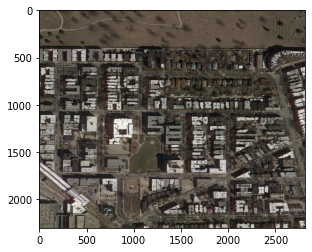

In [8]:
# gentrified

path = os.path.join(dir, 'gentrified')
img_array_g = cv2.imread(os.path.join(path, '10100.png'), cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_array_g, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
# check the shape

img_array_g.shape

(2304, 2816, 3)

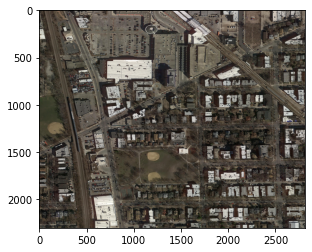

In [10]:
# non_gentrified

path = os.path.join(dir, 'non-gentrified')
img_array = cv2.imread(os.path.join(path, '10202.png'), cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
# check the shape

img_array.shape

(2304, 2816, 3)

In [12]:
from skimage.color import rgb2hsv

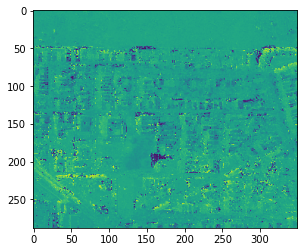

In [13]:
# standardize the size to 2304 * 2800

IMAGE_SIZE_0 = 350
IMAGE_SIZE_1 = 288

new_array = cv2.resize(img_array_g, (IMAGE_SIZE_0, IMAGE_SIZE_1))
hsv_img = rgb2hsv(new_array)
hue_img = hsv_img[:, :, 0]
plt.imshow(hue_img)
plt.show()

In [14]:
hue_img.shape

(288, 350)

In [15]:
# calss info

print(f"The class index for gentrified is {1}.")
print(f"The class index for non-gentrified is {0}.")

The class index for gentrified is 1.
The class index for non-gentrified is 0.


In [16]:
len(os.listdir(os.path.join(dir, 'gentrified')))

158

In [17]:
from skimage.color import rgb2hsv

In [18]:
# create training data

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(dir, category)
    if category == 'gentrified':
      class_num = 0
    else:
      class_num = 1
    
    i = 0
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
      new_array = cv2.resize(img_array, (IMAGE_SIZE_0, IMAGE_SIZE_1))
      hsv_img = rgb2hsv(new_array)
      hue_img = hsv_img[:, :, 0]
      training_data.append([hue_img, class_num])
      i += 1
      if i == 158:
        break

create_training_data()

In [19]:
# let's take a look at one data

training_data[0][0].shape

(288, 350)

In [20]:
# process the data

random.shuffle(training_data)

X_train= []
y_train = []

for pixel, label in training_data:
  X_train.append(pixel)
  y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMAGE_SIZE_0, IMAGE_SIZE_1, 1)
X_train = X_train/255.0

y_train = np.array(y_train)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [23]:
X_train.shape

(211, 350, 288, 1)

In [ ]:
import pickle

with open('/content/drive/MyDrive/data/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f,  protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/data/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f,  protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# build the model 

from keras.layers import Flatten, Dense
from keras import Sequential

In [ ]:
from keras.backend import dropout
# build the model 

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=X_train.shape[1:]),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(16),

        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# train it! 

model.fit(X_train, y_train, batch_size=16, epochs=200, validation_split=0.25)

Epoch 1/200
10/10 [==============================] - 2s 103ms/step - loss: 2.1538 - accuracy: 0.5443 - val_loss: 2.8479 - val_accuracy: 0.4528
Epoch 2/200
10/10 [==============================] - 1s 82ms/step - loss: 0.1573 - accuracy: 0.9241 - val_loss: 2.1738 - val_accuracy: 0.4528
Epoch 3/200
10/10 [==============================] - 1s 77ms/step - loss: 0.0859 - accuracy: 0.9873 - val_loss: 2.1009 - val_accuracy: 0.4528
Epoch 4/200
10/10 [==============================] - 1s 76ms/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 2.3175 - val_accuracy: 0.4528
Epoch 5/200
10/10 [==============================] - 1s 77ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1652 - val_accuracy: 0.4528
Epoch 6/200
10/10 [==============================] - 1s 79ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.0742 - val_accuracy: 0.4528
Epoch 7/200
10/10 [==============================] - 1s 74ms/step - loss: 3.9586e-04 - accuracy: 1.0000 - val_loss: 2.8461 - val_accuracy: 0.4528
E

In [ ]:
# performance

test_loss0, test_acc0 = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss0)
print("Test accuracy:", test_acc0)

Test loss: 2.0748655796051025
Test accuracy: 0.6285714507102966


In [ ]:
model.save('/content/drive/MyDrive/images_training/model_hue1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/images_training/model_hue1/assets


In [ ]:
# import package

import tensorflow as tf 
tf.compat.v1.disable_v2_behavior()   
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import pickle
from tensorflow.keras import layers
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/images_training/model_hue1')

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 348, 286, 64)      640       
                                                                 
 batch_normalization_10 (Bat  (None, 348, 286, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 174, 143, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 172, 141, 64)      36928     
                                                                 
 batch_normalization_11 (Bat  (None, 172, 141, 64)     256       
 chNormalization)                                                
                                                      

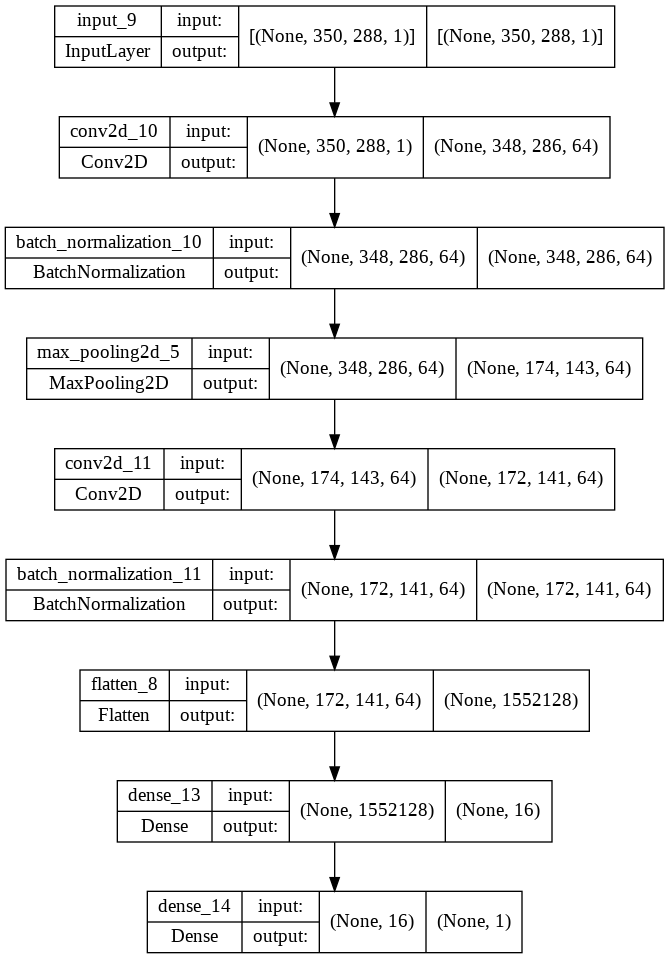

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Pytorch

import shap
tf.keras.backend.set_learning_phase(True)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
y_test

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
background = X_train[np.random.choice(X_train.shape[0], 6, replace=False)]
test_images = np.array([X_test[0], X_test[1], X_test[2], X_test[-2]])

In [ ]:
test_images[0].shape

(350, 288, 1)

In [ ]:
e = shap.DeepExplainer(model, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values = e.shap_values(test_images)

In [ ]:
shap_values[0].shape

(4, 350, 288, 1)

In [ ]:
b = [s.reshape((4, 288, 350, 1)) for s in shap_values]

In [ ]:
b[0].shape

(4, 288, 350, 1)

In [ ]:
test_numpy = np.array([t.reshape(288, 350) for t in test_images])

In [ ]:
test_numpy.shape

(4, 288, 350)

In [ ]:
a = np.array(shap_values).reshape((4, 350, 288, 1))

In [ ]:
a.shape

(4, 350, 288, 1)

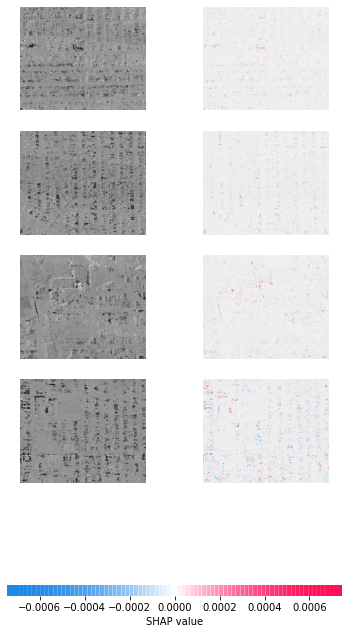

In [ ]:
shap.image_plot(b, test_numpy)

# Embedding Extraction

In [ ]:
# Extract the  layer

extractor = keras.Model(inputs=model.inputs,
                        outputs=[model.layers[-2].output])

In [ ]:
model_hue.layers[-2]

In [ ]:
# create training data

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(dir, category)
    if category == 'gentrified':
      class_num = 0
    else:
      class_num = 1
    
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
      new_array = cv2.resize(img_array, (IMAGE_SIZE_0, IMAGE_SIZE_1))
      hsv_img = rgb2hsv(new_array)
      hue_img = hsv_img[:, :, 0]
      training_data.append(([hue_img, class_num], img.split('.')[0]))

create_training_data()

In [ ]:
training_data[0][1]

'10501'

In [ ]:
# process the data

X_train= []
y_train = []

for row in training_data:
  X_train.append(row[0][0])
  y_train.append(row[0][1])

X_train = np.array(X_train).reshape(-1, IMAGE_SIZE_0, IMAGE_SIZE_1, 1)
X_train = X_train/255.0

y_train = np.array(y_train)

In [ ]:
X_train.shape

(798, 350, 288, 1)

In [ ]:
import csv

In [ ]:
with open('/content/drive/MyDrive/img_emb_16.csv', 'w', newline="", encoding='utf-8') as csvfile:
  output = csv.writer(csvfile)
  for i in range(X_train.shape[0]):
    input = X_train[i].reshape((-1, 350, 288, 1))
    feature_array = extractor(input).numpy()
    embeddings_lst = feature_array.tolist()[0]
    output.writerow([training_data[i][1]] + embeddings_lst)